In [25]:
import numpy
import math 
from matplotlib import pyplot 
%matplotlib inline 

In [60]:
N = 50 
x_start, x_end = -2.0,2.0
y_start, y_end = -.50,.50
x = numpy.linspace(x_start,x_end,N)
y = numpy.linspace(y_start,y_end,N)
X,Y = numpy.meshgrid(x,y)

In [61]:
N_v = 11
gamma = 5*numpy.ones(N_v)
x_vortex , y_vortex = numpy.linspace(x_start,x_end,N_v) , numpy.zeros(N_v)

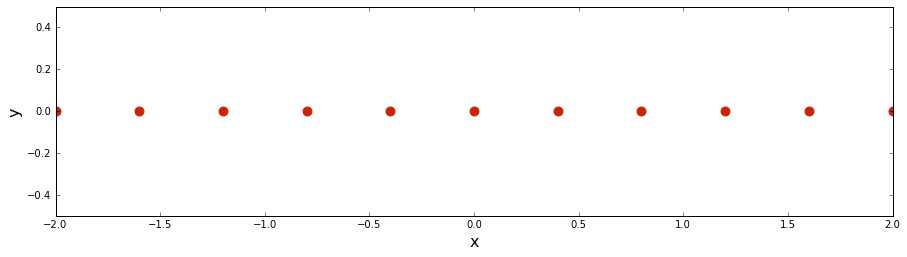

In [62]:
size = 15
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [63]:
def get_velocity_vortex(strength,xv,yv,X,Y):
    
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2) 
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u,v

In [64]:
def get_stream_function_vortex(strength, xv , yv, X , Y):
    
    psi = strength/(4*numpy.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi 

In [65]:
u_ans,v_ans = numpy.zeros((N,N), dtype = float),numpy.zeros((N,N), dtype = float)
psi_ans = numpy.zeros((N,N), dtype = float)

for i in range(N_v):

    
    u_temp,v_temp = get_velocity_vortex(gamma[i],x_vortex[i],y_vortex[i],X,Y)
    psi_temp = get_stream_function_vortex(gamma[i],x_vortex[i],y_vortex[i],X,Y)
    
    u_ans = u_ans + u_temp 
    v_ans = v_ans + v_temp
    psi_ans = psi_ans + psi_temp
    
    print(i)

0
1
2
3
4
5
6
7
8
9
10


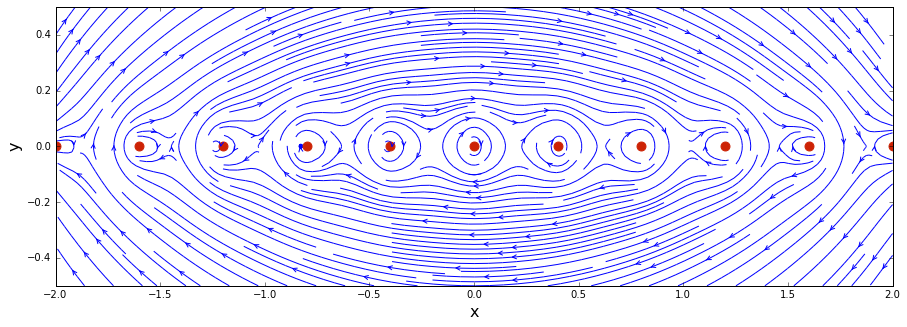

In [67]:
size = 15
pyplot.figure(figsize=(size, size/3))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_ans, v_ans, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');